# 📦-Muller Transform

So, you want to generate pairs of normally distributed random values. But all you have is a Uniform Random Number Generator (URNG) and an old LCD calculcator, only capable of computing stuff like `sqrt`, `ln`, and `sin`/`cos`!

Luckily for you, George Edward Pelham 📦 and Mervin Edgar Muller came up with a method for generating pairs of independent normally distributed random values using exactly this setup. They published their result in a 1958 paper [1] so *you* can youse it, too! The paper is 2 pages long, so you should read it, you will not spend too much time on it.

For the purpose of reference, I shall directly quote the definition of the method from the paper.

> *Method*: Let $U_1$, $U_2$ be independent random variables from the same rectangular density function on the interval $(0, 1)$. Consider the random variables:
>
> $$ X_1 = (-2 \log_e{U_1})^{1/2}\cos{2 \pi U_2} $$
> $$ X_2 = (-2 \log_e{U_1})^{1/2}\sin{2 \pi U_2} $$
>
> Then $(X_1, X_2)$ will be a pair of independent random variables from the same normal distribution with mean zero, and unit variance.


## Programming

Let's try this out in a Python program. As a URNG we can use `random.random()` function.

In [1]:
import random

[random.random() for _ in range(10)]

[0.4753315933531843,
 0.5574421838876782,
 0.315570948673519,
 0.3580177267124287,
 0.32063812490476074,
 0.13929380365491306,
 0.5057490341683469,
 0.17078841969069347,
 0.5109030322314936,
 0.8054776434224403]

Now let's transform these using the 📦-Muller Transform:

In [2]:
import math

def box_muller_transform(u1, u2):
    return (
        math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2),
        math.sqrt(-2 * math.log(u1)) * math.sin(2 * math.pi * u2)
    )

[box_muller_transform(random.random(), random.random())
 for _ in range(10)]

[(-0.9959642402301547, 1.9386431614827124),
 (-1.1449082862325126, -0.5617373183863713),
 (0.7274301257133717, 0.7872598668912665),
 (0.3581423523587865, -1.5704747826056042),
 (-0.35951059864242824, 0.10678331205222126),
 (-0.3958015981200754, 0.41338186934711246),
 (-0.03150522792198475, 1.5713557325915182),
 (0.7979782561336045, 0.07279292440370064),
 (-0.28002537738049305, 2.69023263478142),
 (-0.08276129747589964, 0.42223024213506094)]

To me, they look *very* normally distributed. Let's scatter plot them to look at how very normal they are.

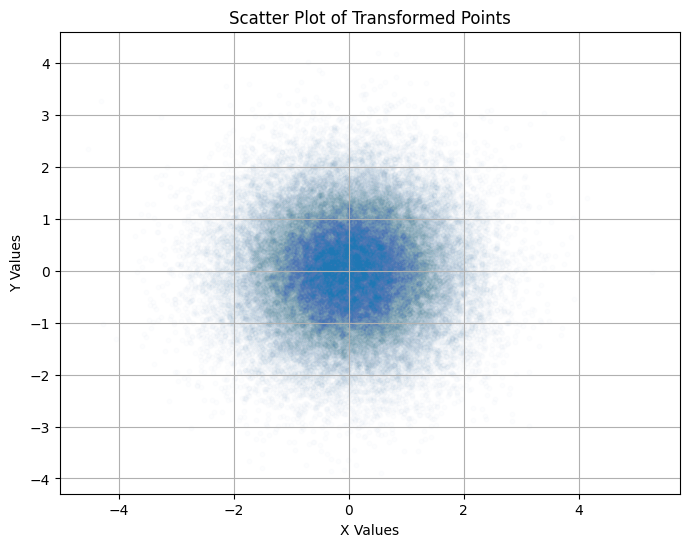

In [93]:
import matplotlib.pyplot as plt

def scatter_plot(transform):
    points = [transform(random.random(), random.random())
              for _ in range(60000)]

    x_coords = [point[0] for point in points]
    y_coords = [point[1] for point in points]

    plt.figure(figsize=(8, 6))
    plt.scatter(x_coords, y_coords, s=10, alpha=0.01)
    plt.xlabel("X Values")
    plt.ylabel("Y Values")
    plt.title("Scatter Plot of Transformed Points")
    plt.grid(True)
    plt.show()

scatter_plot(box_muller_transform)

This scatter plot is so pretty I could stare at it for hours. Only brevity of human life won't let me spend too much time on it. *"I can't simply stare at a plot, I must tweak knobs,"* — my brain tells me, — *"for this is what I'm made for."*

So let's also look at a "knobbed" variant of the transform.

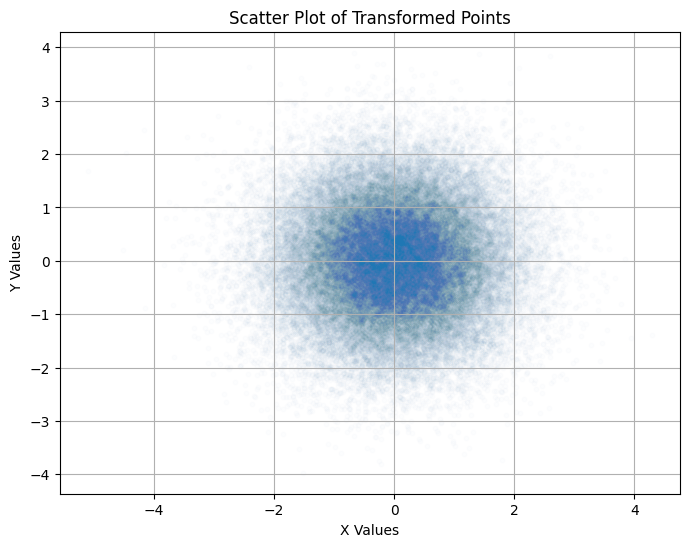

In [102]:
def box_muller_transform(u1, u2, knobs):
    return (
        math.sqrt(knobs[0] * math.log(u1)) * math.cos(knobs[1] * math.pi * u2),
        math.sqrt(knobs[2] * math.log(u1)) * math.sin(knobs[3] * math.pi * u2)
    )

scatter_plot(lambda u1, u2: box_muller_transform(u1, u2, (-2, 2, -2, 2)))

Look at the variety of the plots you may achieve by tweaking the knobs:

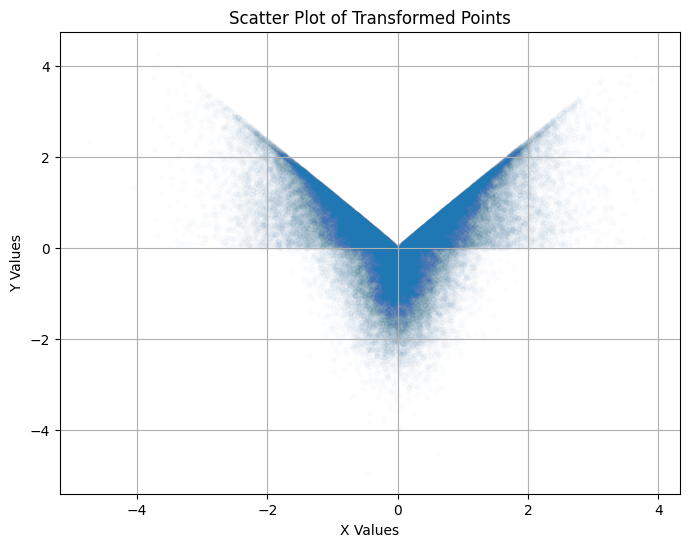

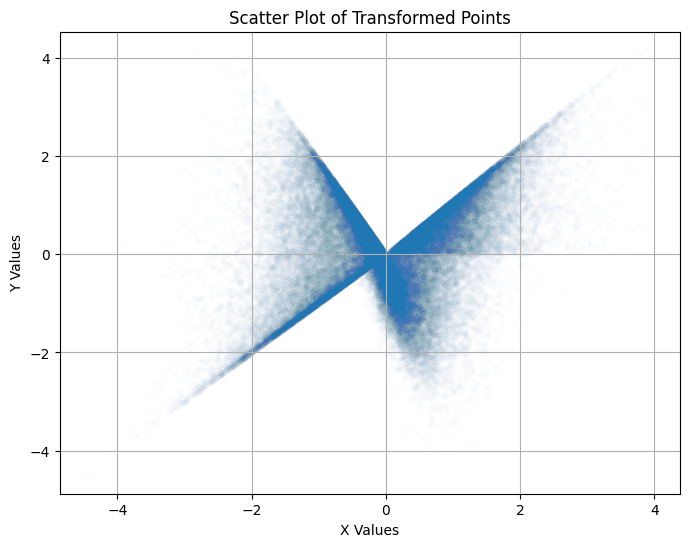

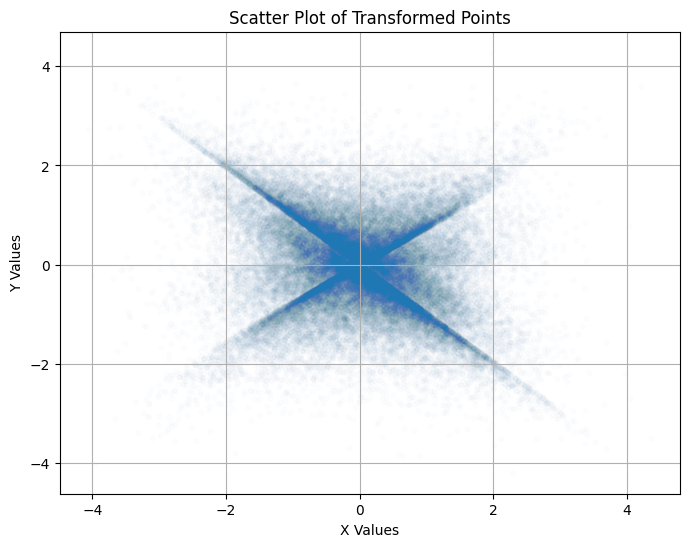

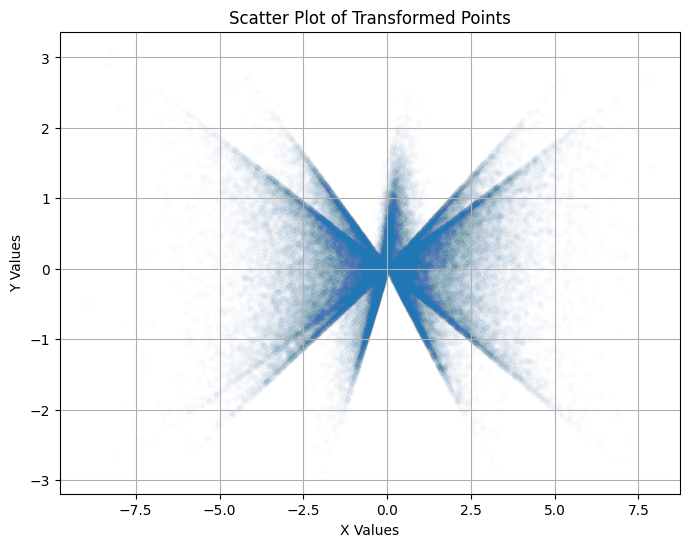

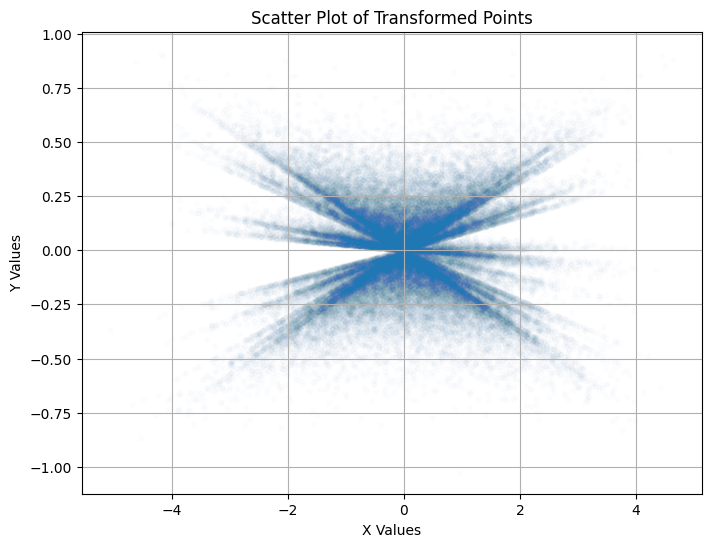

In [121]:
scatter_plot(lambda u1, u2: box_muller_transform(u1, u2, (-2, 1, -2, 3)))
scatter_plot(lambda u1, u2: box_muller_transform(u1, u2, (-2, 1, -2, 3.6)))
scatter_plot(lambda u1, u2: box_muller_transform(u1, u2, (-2, 11, -2, 8)))
scatter_plot(lambda u1, u2: box_muller_transform(u1, u2, (-8, -2, -1, 19)))
scatter_plot(lambda u1, u2: box_muller_transform(u1, u2, (-2.8, 22, -0.1, 1.9)))

## Conclusion

I encourage you to download this notebook and tweak knobs a little bit on your own. The sensation of awe is very much worth it!

I must also mention that Python has a built-in `random.normalvariate()` function for generating normally distributed values. It works well, and it's based on Kinderman and Monahan method, an entirely different method.

In [123]:
[random.normalvariate() for _ in range(10)]

[-2.163249431371103,
 -0.2870039276992549,
 1.1456655984523154,
 0.602385055373415,
 2.218406168605891,
 0.1999023384974562,
 0.9063194853281736,
 -0.6800839304938023,
 0.5334642062351638,
 -0.3455749141011471]

## References

1. G. E. P. Box and M. E. Muller. A note on the generation of random normal deviates. *The Annals of Mathematical Statistics*, 29(2):610–611, June 1958. URL: https://projecteuclid.org/journals/annals-of-mathematical-statistics/volume-29/issue-2/A-Note-on-the-Generation-of-Random-Normal-Deviates/10.1214/aoms/1177706645.full